<Figure size 432x288 with 0 Axes>

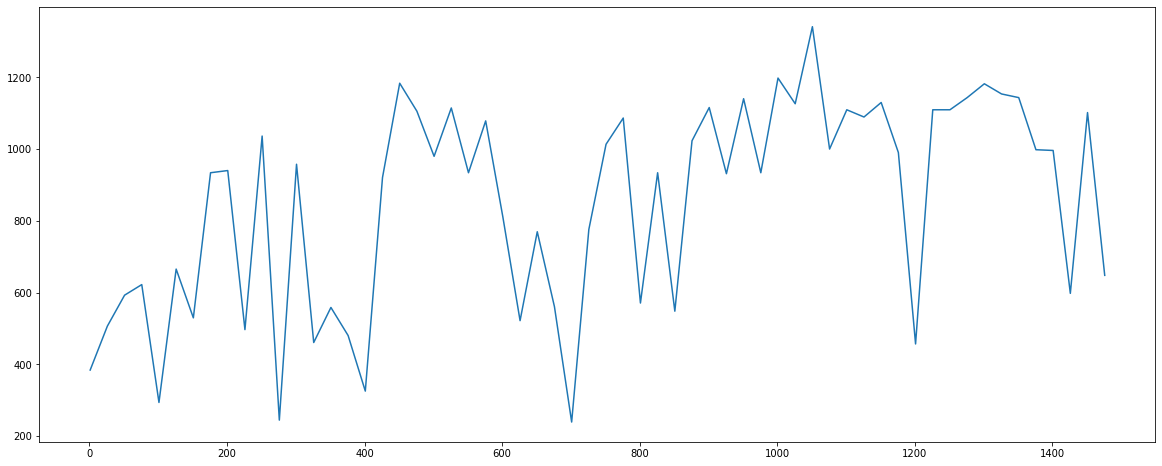

In [49]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
plt.figure()
# data_path = path+"/rl_script/traces/BW_RTT_Trace_"+metric_type+".txt"
folder_path = os.path.abspath('.')+"/performance_records/res_data/"
file_path = folder_path + "spql_1.txt"

f = open(file_path, 'r')
lines = f.readlines()
x_data = []
y_data = []
x_sum = 0
y_sum = 0.0
group = 1
count = group
for data in lines:

    ds = data.split(' ')
    
    x_sum += int(ds[0])
    y_sum += float(ds[1].split('\n')[0])
    count-=1

    if(count==0):
        x_data.append(x_sum/group)
        y_data.append(y_sum/group)
        x_sum = 0
        y_sum = 0.0
        count = group
# print((y_data))

# print(np.mean(y_data[int(len(y_data)/2):])/(200))
# print(y_data[int(len(y_data)/2):])
plt.figure(figsize=(20,8))
# plt.ylim(-1200, 0)

plt.plot(x_data, y_data) #this is a smooth version, replace plot_record by record to see the real version
# plt.title('{}'.format(start_time) + title, fontsize='xx-small')
# plt.xticks(np.arange(0, 160000, 10000))
# plt.show()



In [1]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os

def get_plot_data(algorithm_name):
    print("get_plot_data for:{}".format(algorithm_name))
    data = []
    x_data = []

    new_x_data = []
    group = 10
    
    avg_reward = []
    avg_reward_at_last = []
    avg_reward_after_change_moment = []
    for i in range(1, 5):

        path = os.path.join("performance_records/res_data", "{}_{}.txt".format(algorithm_name,i))
        print(path)
        if os.path.exists(path):
            with open(path, "r") as f:
                d = []
                new_d = []

                line_count = 1
                for line in f:
                    # print("len(x_data):{}".format(len(x_data)))
                    # print("d.append:{}".format(float(line.split(" ")[1].split("\n")[0])))
                    temp = 0
                    if len(x_data) < line_count:
                        # print("x_data.append:{}".format(float(line.split(" ")[0])))
                        temp = float(line.split(" ")[0])
                        if alg == "PPO":
                            temp *= 0.9
                        x_data.append(temp)
                        
                    f_data = float(line.split(" ")[1].split("\n")[0])
                    # print(temp)
                    if alg == 'SPQL' and temp > 9e5:
                        f_data += (200+200*(temp-9e5)/9e5)
                    d.append(f_data)
                    if temp>9e5:
                        avg_reward.append(f_data)
                    if temp>17.5e5:
                        avg_reward_at_last.append(f_data)
                        
                    if temp>9e5 and temp<12e5:
                        avg_reward_after_change_moment.append(f_data)
                    line_count += 1
                    if alg != "PPO" and line_count == (1800000/2000):
                        break
                    elif line_count == (2000000/2000):
                        break
                
                # @hebin: 每十个取个平均
                new_x_data = []
                for j in range(0,len(x_data),group):
                    new_x_data.append(np.mean(x_data[j:j+group]))
                    new_d.append(np.mean(d[j:j+group]))
                # print("x_data:{}".format(len(x_data)))
                # print("new_x_data:{}".format(len(new_x_data)))
                # print("d:{}".format(len(d)))
                # print("new_d:{}".format(len(new_d)))

                data.append(new_d)
                
    # print(data)
    
    print("avg reward:{}".format(np.mean(avg_reward)))
    print("avg avg_reward_at_last:{}".format(np.mean(avg_reward_at_last)))
    print("avg avg_reward_after_change_moment:{}".format(np.mean(avg_reward_after_change_moment)))
    # print(avg_reward)
    # data = np.array(data)
    mean = np.mean(data, 0)
    low_CI_bound, high_CI_bound = st.t.interval(0.95, mean.shape[0], loc=mean, scale=st.sem(data))
    return new_x_data, mean, low_CI_bound, high_CI_bound

if __name__ == "__main__":
    # algs = ["ppo", "ddpg", "td3", "spql"]
    algs = ["PPO", "DDPG", "TD3","SPQL"]
    colors = ["orange", "g", "b", "aqua"]
    # colors = ["orange", "g", "b"]
    plt.figure(figsize=(10, 6))
    for i in range(len(algs)):
        alg = algs[i]
        color = colors[i]
        x, mean, low_bounds, high_bounds = get_plot_data(alg)
        # print(alg)
        # print(np.mean(mean[(int)(len(mean)/2):]))
        # print(mean)
        plt.plot(x, mean, linewidth=3, label=alg.upper(), color=color)
        plt.fill_between(x, low_bounds, high_bounds, alpha=0.3, color=color)
    plt.legend(fontsize=15, loc="lower right")
    plt.grid(color='grey',
             linestyle='--',
             linewidth=1,
             alpha=0.3)
    plt.ylim(1100, 2800)
    plt.xlim(2000, 1800000)
    plt.arrow(1000000, 1200, -60000, 0, width=20, head_width=100, head_length=20000, ec="r", color="r")
    plt.text(1020000, 1185, "Change Moment")
    plt.xlabel("Steps", fontsize=18)
    plt.ylabel("Average reward per episode", fontsize=18)
    plt.xticks( fontsize=12)
    # plt.xticks([40000, 80000, 120000, 160000], fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(x=900000, c="crimson", linewidth=3, alpha=0.5)
    # plt.show()
    plt.savefig("comparison.pdf")


get_plot_data for:PPO
performance_records/res_data/PPO_1.txt
performance_records/res_data/PPO_2.txt
performance_records/res_data/PPO_3.txt
performance_records/res_data/PPO_4.txt
avg reward:1682.3853540278988
avg avg_reward_at_last:1876.1972272112791
avg avg_reward_after_change_moment:1669.5363118066853
get_plot_data for:DDPG
performance_records/res_data/DDPG_1.txt
performance_records/res_data/DDPG_2.txt
performance_records/res_data/DDPG_3.txt
performance_records/res_data/DDPG_4.txt
avg reward:2021.8550880181242
avg avg_reward_at_last:2179.478197918005
avg avg_reward_after_change_moment:1973.9643252285575
get_plot_data for:TD3
performance_records/res_data/TD3_1.txt
performance_records/res_data/TD3_2.txt
performance_records/res_data/TD3_3.txt
performance_records/res_data/TD3_4.txt
avg reward:1992.0307172474268
avg avg_reward_at_last:2015.3121120594344
avg avg_reward_after_change_moment:1870.2098099161276
get_plot_data for:SPQL
performance_records/res_data/SPQL_1.txt
performance_records/r

/home/yhb/miniconda3/envs/rtc36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yhb/miniconda3/envs/rtc36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yhb/miniconda3/envs/rtc36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yhb/miniconda3/envs/rtc36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yhb/miniconda3/envs/rtc36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yhb/miniconda3/envs/rtc36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

In [3]:
# import random
import numpy as np


# print(random.randint(0,100))
sample = [1]
history_data = np.array([])
j = history_data.shape[0]
print(history_data.shape)
history_data = np.insert(history_data, j, sample, axis=0)

(0,)
